# Quantum Generative Adversarial Network

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## Classical Generative Adversarial Network

### Introduction to Generative Adversarial Network

Generative Adversarial Network (GAN) is a generative model, which is a breakthrough in deep learning in recent years [1]. It contains two parts: the generator $G$ and the discriminator $D$. The generator accepts a random noise signal and uses it as input to generate the data we expect. The discriminator evaluates the received data $x$ and outputs a probability $P(x)$ that the data $x$ is real.

### Nash Equilibrium

Here we use the idea of Nash equilibrium to discuss the convergence problem of GAN.

Nash equilibrium refers to a non-cooperative game involving two or more participants, assuming that each participant knows other participants' equilibrium strategies. No participant can change one's strategy to benefit. In the game theory, if each participant chooses his strategy, and no player can benefit by changing the strategy while other participants remain the same, then the current set of strategy choices and their corresponding results constitute Nash Equilibrium.

We can regard the training process of GAN as a game process between generator and discriminator. No matter what the generator's strategy is, the best strategy of the discriminator is to try to distinguish the real data and the generated data. And regardless of the strategy of the discriminator, the best strategy for the generator is to make the discriminator unable to distinguish. This game is a zero-sum game, which is one of non-cooperative game. That is, one party gains while the other party must lose. Therefore, there exists the Nash equilibrium strategy in the game between the generator and the discriminator. When there are enough samples of real data and the learning ability of both parties is strong enough, a Nash equilibrium point will eventually be reached. **The generator has the ability to generate real data, and the discriminator can no longer distinguish between generated data and real data.** 

GAN adopts the idea of Nash equilibrium. In GAN, the generator and the discriminator are playing a non-cooperative game. No matter what strategies the generator adopts, the best strategy of the discriminator is to discriminate as much as possible; and no matter what strategies the discriminator adopts, the best strategy of the generator is to make the discriminator unable to discriminate as much as possible. Therefore, the two parties' strategic combination in the game and the corresponding results constitute the Nash equilibrium. **When the Nash equilibrium is reached, the generator can to generate real data, and the discriminator cannot distinguish between the generated data and the real data**.

### Optimization goal

In GAN, we want to get an excellent generator (but only an excellent discriminator can accurately determine whether the generator is excellent). Our training's ideal result is that the discriminator cannot identify whether the data comes from real data or generated data.

Therefore, our objective function is as follows:

$$
\min_{G}\max_{D} V(G,D)= \min_{G}\max_{D}\mathbb{E}_{x\sim P_{data}}[\log D(x)] +\mathbb{E}_{z\sim P_{z}}[\log(1-D(G(z)))]. \tag{1}
$$

Here, $G$ represents the parameters of the generator and $D$ represents the parameters of the discriminator. In the actual process, the alternate training method is usually adopted; that is, first fix $G$, train $D$, then fix $D$, train $G$, and repeat. When the two's performance is sufficient, the model will converge, and the two will reach the Nash equilibrium.

### Advantages

- Compared with other generative models, GAN generates better results.
- Theoretically, as long as it is a differentiable function, it can be used to build generators and discriminators, so it can be combined with deep neural networks to make deep generative models.
- Compared with other generative models, GAN does not rely on prior assumptions, and we do not need to assume the probability distribution and law of the data in advance.
- The form of data generated by GAN is also very simple, just forward propagation through the generator.

### Disadvantages

- GAN does not require pre-modeling. Too much freedom makes training difficult to converge and unstable.
- GAN has a vanishing gradient problem. In this case, there is no loss in the training of the discriminator, so there is no adequate gradient information to pass back to the generator to optimize itself.
- There may be a problem of model collapse in the learning process of GAN. The generator degenerates, always generating the same sample points, and cannot continue learning. The discriminator also points to similar sample points in similar directions, and the model parameters are no longer updated, but the actual effect is feeble.

## Quantum Generative Adversarial Network

The quantum generative adversarial network is similar to the classical one, except that it is no longer used to generate classical data but generate quantum states [2-3]. In practice, if we have a quantum state, it will collapse to a certain eigenstate after observation and cannot be restored to the previous quantum state. Therefore, if we have a method that generates many identical (or similar) quantum states based on the existing target quantum state, it will be very convenient for our experiments.

Assuming that our existing target quantum states all come from a mixed state, they belong to the same ensemble, and their density operator is $\rho$. Then we need to have a generator $G$ whose input is noise data, denoted by the ensemble $\rho_{z}=\sum_{i}p_{i}|z_{i}\rangle\langle z_ {i}|$. Therefore, we take out a random noise sample $|z_{i}\rangle$ every time and get the generated quantum state $|x\rangle=G|z_{i}\rangle$ after passing through the generator. We expect the generated $| x\rangle$ that is close to the target quantum state $\rho$.

It is worth noting that for the ensemble of the target state and the ensemble of the noise data mentioned above, we think that there exists a physical device that can generate a quantum state from the ensemble. According to quantum physics, We can get a genuinely random quantum state every time. However, in computer programs, we need to simulate this process.

We expect the discriminator to judge whether the quantum state we input is an existing target state or a generated quantum state. This process needs to be given by measurement.


## A simple example

### Problem Description

For simplicity, we assume that the existing target quantum state is a pure state, and the input state for the generator is $|0\rangle$.


The circuit to prepare the existing target quantum state:
![QGAN-fig-target_state](figures/QGAN-fig-target_state.png)

The circuit of the generator is:
![QGAN-fig-generator](figures/QGAN-fig-generator.png)

The circuit of the discriminator is:
![QGAN-fig-discriminator](figures/QGAN-fig-discriminator.png)

By measuring the quantum state output by the discriminator, we can get the probability of judging the target state as the target state $P_{T}$ and the probability of judging the generated state as the target state $P_{G}$.

### Specific process

Assuming that the existing target quantum state is $|\psi\rangle$, the quantum state generated by the generator is $|x\rangle=G|00\rangle$ (the generator uses a two-qubit circuit, of which the 0th qubit is a generated quantum state).

The discriminator discriminates the data and obtains the quantum state $|\phi\rangle$ when the input is the target state, $|\phi\rangle=D(|\psi\rangle\otimes |00\rangle)$; When the input is generated state, $|\phi\rangle=D(G\otimes I)|000\rangle$.

For the quantum state obtained by the discriminator, we also need to use the Pauli Z gate to measure the third qubit so as to obtain the judgment result of the input quantum state by the discriminator (that is, the probability that the discriminator thinks the input is the target state). First there is $M_{z}=I\otimes I\otimes\sigma_{z}$, and the measurement result is $\text{disc_output}=\langle\phi|M_{z}|\phi\rangle$, so the probability of the measurement that the result is the target state is $P=(\text{disc_output}+1)/2$.

We define the loss function of the discriminator as $\mathcal{L}_{D}=P_{G}(\text{gen_theta}, \text{disc_phi})-P_{T}(\text{disc_phi})$, The loss function of the generator is $\mathcal{L}_{G}=-P_{G}(\text{gen_theta}, \text{disc_phi})$. Here, $P_{G}$ and $P_{T}$ are the expressions of $P=(\text{disc_output}+1)/2$, when the input quantum state is the generated state and the target state, respectively. gen_theta and disc_phi are the parameters of the generator and discriminator circuits.

So we only need to optimize the objective function $\min_{\text{disc_phi}}\mathcal{L}_{D}$ and $\min_{\text{gen_theta}}\mathcal{L}_{G}$ respectively. The discriminator and generator can be alternately trained.

## Paddle Quantum Implementation

First import the relevant packages.

In [1]:
import numpy as np
import paddle
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import partial_trace, dagger, state_fidelity
from tqdm import tqdm

Then define our network model QGAN.

In [2]:
class QGAN(paddle.nn.Layer):
    def __init__(self):
        super(QGAN, self).__init__()
        
        # The angle used to prepare the target quantum state
        target_omega_0 = 0.9 * np.pi
        target_omega_1 = 0.2 * np.pi
        self.target_omega = paddle.to_tensor(
            np.array([target_omega_0, target_omega_1], np.float64))
        
        # Generator and discriminator circuit parameters
        self.gen_theta = self.create_parameter([9], 
        dtype="float64", default_initializer=paddle.nn.initializer.Uniform(
                            low=0.0, high=np.pi))
        self.disc_phi = self.create_parameter([9], 
        dtype="float64", default_initializer=paddle.nn.initializer.Uniform(
                            low=0.0, high=np.pi))
        
        # Prepare target quantum state
        cir = UAnsatz(3)
        cir.ry(self.target_omega[0], 0)
        cir.rz(self.target_omega[1], 0)
        self.target_state = cir.run_state_vector()

    def generator(self, theta):
        """
        Generator quantum circuit
        """
        cir = UAnsatz(3)
        cir.u3(*theta[:3], 0)
        cir.u3(*theta[3:6], 1)
        cir.cnot([0, 1])
        cir.u3(*theta[6:], 0)

        return cir

    def discriminator(self, phi):
        """
        Quantum circuit of the discriminator
        """
        cir = UAnsatz(3)
        cir.u3(*phi[:3], 0)
        cir.u3(*phi[3:6], 2)
        cir.cnot([0, 2])
        cir.u3(*phi[6:], 0)

        return cir

    def disc_target_as_target(self):
        """
        The probability that the discriminator judges the target state as the target state
        """
        # Discriminator circuit
        cir = self.discriminator(self.disc_phi)
        cir.run_state_vector(self.target_state)

        # The judgment result of the discriminator on the target state
        target_disc_output = cir.expecval([[1.0,'z2']])
        prob_as_target = (target_disc_output + 1) / 2

        return prob_as_target

    def disc_gen_as_target(self):
        """
        The probability that the discriminator judges the generated state as the target state
        """
        # Get the quantum state generated by the generator
        gen_state = self.generator(
                 self.gen_theta).run_state_vector()
        # Discriminator circuit
        cir = self.discriminator(self.disc_phi)
        cir.run_state_vector(gen_state)
        # The judgment result of the discriminator on the generated state
        gen_disc_output = cir.expecval([[1.0,'z2']])
        prob_as_target = (gen_disc_output + 1) / 2

        return prob_as_target

    def forward(self, model_name):
        if model_name =='gen':
         # Calculate the loss function of the generator, the interval of the loss value is [-1, 0],
         # 0 means extremely poor generation effect, -1 means excellent generation effect
            loss = -1 * self.disc_gen_as_target()
        else:
         # Calculate the loss function of the discriminator, the loss value range is [-1, 1],
         # -1 means perfect distinction, 0 means indistinguishable, 1 means inverted distinction
            loss = self.disc_gen_as_target() - self.disc_target_as_target()

        return loss

    def get_target_state(self):
        """
        Get the density matrix representation of the target state
        """
        state = self.target_state
        state = paddle.reshape(state, [1] + state.shape)
        density_matrix = paddle.matmul(dagger(state), state)
        state = partial_trace(density_matrix, 2, 4, 2)

        return state.numpy()

    def get_generated_state(self):
        """
        Get the density matrix representation of the generated state
        """
        state = self.generator(
             self.gen_theta).run_state_vector()
        state = paddle.reshape(state, [1] + state.shape)
        density_matrix = paddle.matmul(dagger(state), state)
        state = partial_trace(density_matrix, 2, 4, 2)

        return state.numpy()

Next, we use PaddlePaddle to train our model.

In [3]:
# Learning rate
LR = 0.1
# Total number of iterations
ITR = 15
# In each iteration, the number of iterations of the discriminator
ITR1 = 20
# In each iteration, the number of generator iterations
ITR2 = 50

# Used to record the change of loss value
loss_history = list()
paddle.seed(18)
gan_demo = QGAN()
optimizer = paddle.optimizer.SGD(learning_rate=LR, parameters=gan_demo.parameters())
pbar = tqdm(desc="Training: ", total=ITR * (ITR1 + ITR2), ncols=100, ascii=True)
for itr0 in range(ITR):

    # Record the change in the loss value of the discriminator
    loss_disc_history = list()

    # Train the discriminator
    for itr1 in range(ITR1):
        pbar.update(1)
        loss_disc = gan_demo('disc')
        loss_disc.backward()
        optimizer.minimize(loss_disc, parameters
                           =[gan_demo.disc_phi],
                           no_grad_set=[gan_demo.gen_theta])
        gan_demo.clear_gradients()
        loss_disc_history.append(loss_disc.numpy()[0])

    # Record the change of the generator loss value
    loss_gen_history = list()

    # Training generator
    for itr2 in range(ITR2):
        pbar.update(1)
        loss_gen = gan_demo('gen')
        loss_gen.backward()
        optimizer.minimize(loss_gen, parameters
                           =[gan_demo.gen_theta],
                           no_grad_set=[gan_demo.disc_phi])
        optimizer.clear_grad()
        loss_gen_history.append(loss_gen.numpy()[0])

    loss_history.append((loss_disc_history, loss_gen_history))
pbar.close()

# Get the target quantum state
target_state = gan_demo.get_target_state()

# Get the final quantum state generated by the generator
gen_state = gan_demo.get_generated_state()
print("the density matrix of the target state:")
print(target_state, "\n")
print("the density matrix of the generated state:")
print(gen_state, "\n")

# Calculate the distance between two quantum states,
# The distance here is defined as tr[(target_state-gen_state)^2]
distance = np.trace(np.matmul(target_state-gen_state,
                              target_state-gen_state)).real
# Calculate the fidelity of two quantum states
fidelity = state_fidelity(target_state, gen_state)
print("the distance between these two quantum states is", distance, "\n")
print("the fidelity between these two quantum states is", fidelity)

Training: 100%|#################################################| 1050/1050 [01:31<00:00, 11.51it/s]


the density matrix of the target state:
[[0.02447174+0.00000000e+00j 0.125     +9.08178160e-02j]
 [0.125     -9.08178160e-02j 0.97552826+5.16498656e-18j]] 

the density matrix of the generated state:
[[0.0244643 -5.29696618e-19j 0.12657544+8.85689120e-02j]
 [0.12657544-8.85689120e-02j 0.9755357 -2.82739625e-19j]] 

the distance between these two quantum states is 1.5079277656078345e-05 

the fidelity between these two quantum states is 0.9999962306522913


We compare the target quantum state's density matrix $\rho_\text{target}$ and  the generated quantum state's density matrix $\rho_\text{gen}$ and calculate the distance between them $\text{tr}[(\rho_\text{target}-\rho_\text{gen})^2]$ and fidelity. We can know that our generator generates a quantum state very close to the target state.

## Visualization of the training process

Next, let's observe the change of the discriminator and generator's loss curve during the training process.

First install the required packages.

In [4]:
from IPython.display import clear_output
!pip install celluloid
clear_output()

Next, we draw the change of the loss curve.

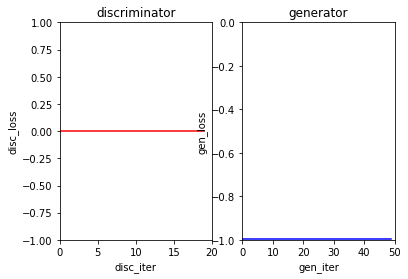

In [5]:
import matplotlib.pyplot as plt
from celluloid import Camera
def draw_pic(loss_history):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    camera = Camera(fig)
    axes[0].set_title("discriminator")
    axes[0].set_xlabel("disc_iter")
    axes[0].set_ylabel("disc_loss")
    axes[0].set_xlim(0, 20)
    axes[0].set_ylim(-1, 1)
    axes[1].set_title("generator")
    axes[1].set_xlabel("gen_iter")
    axes[1].set_ylabel("gen_loss")
    axes[1].set_xlim(0, 50)
    axes[1].set_ylim(-1, 0)
    for loss in loss_history:
        disc_data, gen_data = loss
        disc_x_data = range(0, len(disc_data))
        gen_x_data = range(0, len(gen_data))
        axes[0].plot(disc_x_data, disc_data, color='red')
        axes[1].plot(gen_x_data, gen_data, color='blue')
        camera.snap()
    animation = camera.animate(interval=600, 
                               repeat=True, repeat_delay=800)
    animation.save("./figures/loss.gif")
draw_pic(loss_history)
clear_output()

![QGAN-fig-loss](./figures/loss.gif)

In this dynamic picture, each frame represents an iterative process. In an iteration, the red line on the left represents the loss curve of the discriminator, and the blue line on the right represents the loss curve of the generator. It can be seen that at the initial stage, the discriminator and generator can gradually learn from a poor discriminant ability and generation ability to a better discrimination ability and generation ability in the current situation. As the learning progresses, the generator’s generation ability is getting stronger and stronger, and the discriminator’s ability is getting stronger and stronger. However, the discriminator can not distinguish the real data and the generated data because the generator has generated data close to real data. At this time, the model has converged.

_______

## References

[1] Goodfellow, I. J. et al. Generative Adversarial Nets. [Proc. 27th Int. Conf. Neural Inf. Process. Syst. (2014).](https://papers.nips.cc/paper/5423-generative-adversarial-nets)

[2] Lloyd, S. & Weedbrook, C. Quantum Generative Adversarial Learning. [Phys. Rev. Lett. 121, 040502 (2018).](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.040502)

[3] Benedetti, M., Grant, E., Wossnig, L. & Severini, S. Adversarial quantum circuit learning for pure state approximation. [New J. Phys. 21, (2019).](https://iopscience.iop.org/article/10.1088/1367-2630/ab14b5)
